C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The number of clusters not having any geo tagged data are: [11]


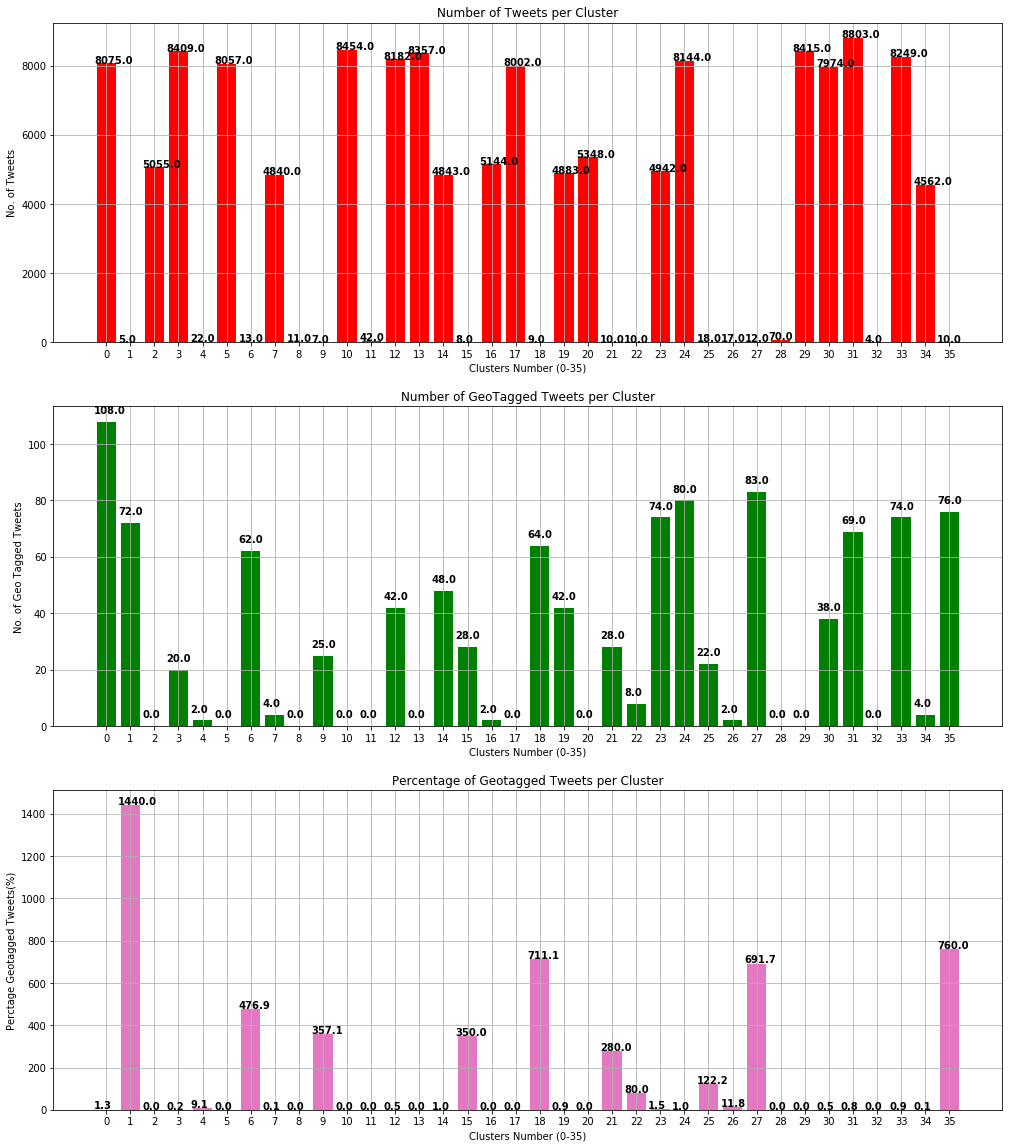

In [51]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

data = np.genfromtxt('GeoClusterCount.csv', delimiter='\t')
cluster_name = data[:,0]
cluster_count = data[:,1]
cluster_name = cluster_name[np.argsort(cluster_name)]
cluster_count = cluster_count[np.argsort(cluster_name)]
allcounts = np.genfromtxt('counts.txt', delimiter=' ')
percentage_tagged = (cluster_count/allcounts)*100
fig = plt.figure(figsize=(17,20))  # create a new figure

ax = fig.add_subplot(3,1,1)
ax.cla()
ax.set_xlabel('Clusters Number (0-35)')
ax.set_ylabel('No. of Tweets')
ax.grid('on')
ax.set_title('Number of Tweets per Cluster')
ax.bar(cluster_name,allcounts,color='red')
for i, v in enumerate(allcounts):
    ax.text(i-0.5,v+3, str(v), color='Black', fontweight='bold')
ax.set_xticks(cluster_name)

ax = fig.add_subplot(3, 1, 2) 
ax.cla()
ax.set_xlabel('Clusters Number (0-35)')
ax.set_ylabel('No. of Geo Tagged Tweets')
ax.grid('on')
ax.set_title('Number of GeoTagged Tweets per Cluster')
ax.bar(cluster_name,cluster_count,color='green')
for i, v in enumerate(cluster_count):
    ax.text(i-0.5,v+3, str(v), color='Black', fontweight='bold')
ax.set_xticks(cluster_name)

ax = fig.add_subplot(3,1,3)
ax.cla()
ax.set_xlabel('Clusters Number (0-35)')
ax.set_ylabel('Perctage Geotagged Tweets(%)')
ax.grid('on')
ax.set_title('Percentage of Geotagged Tweets per Cluster')
ax.bar(cluster_name,percentage_tagged,color='C6')
for i, v in enumerate(np.around(percentage_tagged,1)):
    ax.text(i-0.5,v+3, str(v), color='Black', fontweight='bold')
ax.set_xticks(cluster_name)

# Count number of clusters having no geo information
unique, counts = np.unique(cluster_count, return_counts=True)
print('The number of clusters not having any geo tagged data are:',counts[unique==0])